In [2]:
# 展示时隐藏代码
import IPython.core.display as di
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 白酒行业基本情况

## 产销量数据

**数据来源：**国家统计局（折合为65度白酒，产量为月度数据，销量为季度数据）

**月度数据：**包含每月产量、累计产量；数据从1989年起；缺少的数据：1994/1996年，199807-199812；200001-200003；201601-201602

**季度数据：**包含销量、产销率、期末库存；自1998年起

产销率：销售量/生产量

**注意：**统计口径有一定变化，如下图所示

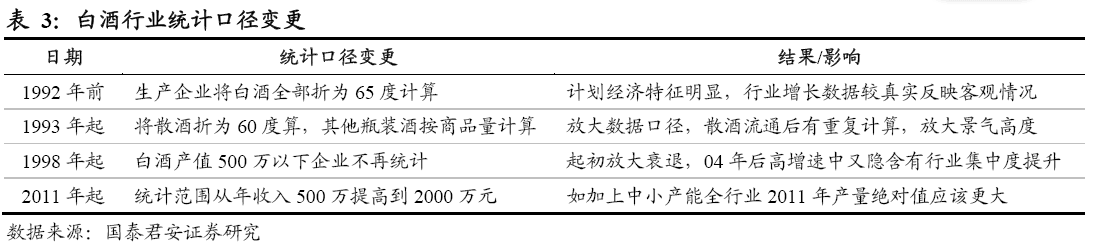

In [4]:
from IPython.display import display, Image
# display(Image(r'pic/1.png', width=100))
display(Image(r'pic/白酒统计口径.png'))

In [5]:
output = pd.read_csv(r'data/月度数据.csv', skiprows=2, skipfooter=2, engine='python')

In [6]:
s = []
for i in output['时间']:
    s.append(i.replace('年', '-').replace('月', ''))
output.index = [pd.to_datetime(t) for t in s]

In [7]:
del output['时间']

In [8]:
output.columns = ['白酒当期产量', '白酒累计产量', '白酒同比增长', '白酒累计增长']

### 白酒产量数据

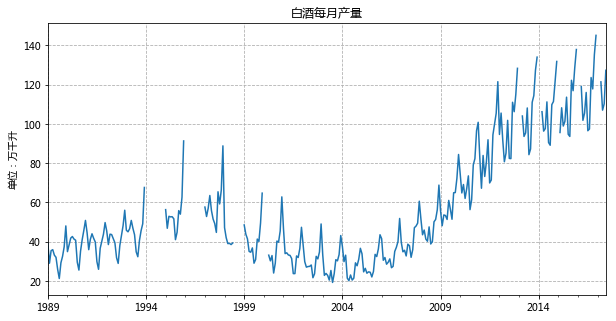

In [9]:
output['白酒当期产量'].plot(kind='line', figsize = (10, 5))
# plt.grid(axis='y', linestyle='--')
plt.title('白酒每月产量')
plt.ylabel('单位：万千升')
plt.grid(linestyle='--')
plt.savefig(r'pic/白酒每月产量.png')
plt.show();

#### 白酒的季节性特征

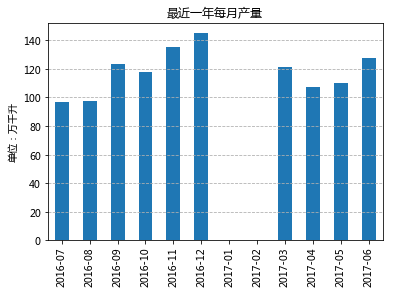

In [10]:
s = output['白酒当期产量'][-12:]
# s.index = ['201607', '201608', '201609', '201610', '201611', '201612', '201701', '201702', '201703', '201704', '201705', '201706']
a = pd.date_range(start='2016-07', end='2017-07', freq='M')
a = [str(i)[:7] for i in a]

s.index = a
s.plot(kind='bar')
plt.grid(axis='y', linestyle='--')
plt.title('最近一年每月产量')
plt.ylabel('单位：万千升')
# plt.grid(linestyle='--')
plt.savefig(r'pic/最近一年每月产量.png')
plt.show();

从上面的信息可以看到（白酒产销一般情况较为接近），白酒生产具有鲜明的季节性，一年中呈现出明显的淡旺季特征。以过去12个月为例，7-8月份为淡季；到
了年底则进入行业旺季。

背后的原因也很显然，节假日白酒的消费量比平日要多很多，如春节、国庆中秋节等都是传统的白酒旺季。

#### 白酒行业历年发展

In [11]:
output_year = output[output.index.month == 12]
output_year.index = range(1989, 2017)

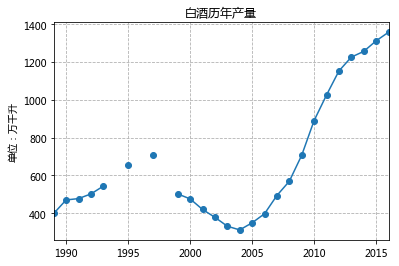

In [12]:
output_year['白酒累计产量'].plot(marker='o')
plt.title('白酒历年产量')
plt.ylabel('单位：万千升')
plt.grid(linestyle='--')
plt.savefig(r'pic/白酒历年产量.png')
plt.show();

从上图可以看到，自1989年之后，白酒产量在1997年达到最高峰。

1998年后产量一路下滑，一直到2004年产量到达谷底（此时白酒产量甚至比1989年还要低很多）。

2004年之后，白酒行业发展较为迅速，一直高速增长到2012年;期间白酒产销率年复合均增速达到17.31%和17.77%。

2012年之后白酒行业不再高速增长，但行业总产量仍然继续增加。

下面把目光聚集在白酒行业的两个转折点：

1. 1998-2004年的产量下滑：

    a. 一方面因为统计口径的变化，1998年开始只统计500万产值以上的企业；

    b. 另一方面也是最主要的原因。1998年发生了影响较大的“朔州毒酒案”，全国开始全面清理整顿白酒行业。
    
    c. 产业政策方面：
    
    在之前的1997年，中国轻工总会发布酿酒行业环保政策​，严格控制酒类企业生产能力；
    
    其后在2001年，白酒行业的税收在原来基础上，每斤要多收0.5元的消费税。  

2. 2012年行业增速的转折

    a. 此次调整主要是由于限制三公消费，2012年初央视抛出“限酒令”，3月底国务院严格控制“三公”经费，年底则有中央军委下发的“禁酒令”
    
    b. 此外还有2012年年中的酒鬼酒“塑化剂”风波。

### 白酒销量数据

In [13]:
sales = pd.read_csv(r'data/季度数据.csv', skiprows=2, skipfooter=1, engine='python')

In [14]:
sales.index = pd.date_range(start='1998Q1', end='2017Q3', freq='Q')

In [15]:
del sales['时间']

In [16]:
sales.columns = ['白酒累计销售', '白酒产销率', '产销率同比', '库存比年初增长']

#### 白酒产销率

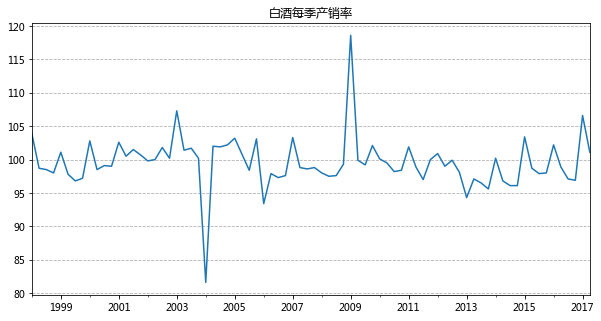

In [17]:
sales['白酒产销率'].plot(kind='line', figsize = (10, 5))
# plt.grid(axis='y', linestyle='--')
plt.title('白酒每季产销率')
# plt.ylabel('单位：万千升')
plt.grid(axis='y', linestyle='--')
plt.savefig(r'pic/白酒每季产销率.png')
plt.show();

从产销率数据来看，大多数时候白酒行业产销量都接近100%，波动幅度在95%和105%之间。

其中有两个峰值分别出现在2004年和2009年：

2004年的产销率一度降到80%的水平，这也与之前提到的2004年产量谷底相一致；

2009年产销率则最高接近120%，此时正是白酒行业高速发展中。

#### 白酒销量

In [18]:
sales_year = sales[sales.index.month == 12]

In [19]:
sales_year.index = range(1998, 2017)

In [20]:
sales_year

,白酒累计销售,白酒产销率,产销率同比,库存比年初增长
1998,549.1,98.0,NaN,10.3
1999,480.6,97.2,NaN,16.2
2000,468.8,99.0,NaN,0.4
2001,419.5,100.7,NaN,-3.2
2002,373.5,100.2,NaN,1.2
2003,330.1,100.2,NaN,-0.9
2004,314.2,102.2,NaN,-12.9
2005,358.1,103.1,0.9,-1.2
2006,383.9,97.6,-5.5,8.2
2007,485.2,98.8,1.2,3.6


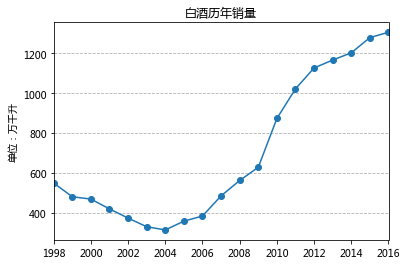

In [21]:
sales_year['白酒累计销售'].plot(marker='o')
# plt.grid(axis='y', linestyle='--')
plt.title('白酒历年销量')
plt.ylabel('单位：万千升')
plt.grid(axis='y', linestyle='--')
plt.savefig(r'pic/白酒历年销量.png')
plt.show();

从销量数据来看，与产量数据也较为一致。

白酒销量自1998年一路下滑，直至2005年探底。此后则属于高速增长期，知道2013年开始增速降低

### 白酒库存变化

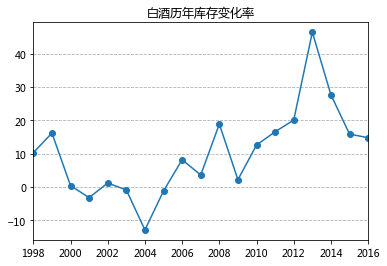

In [22]:
sales_year['库存比年初增长'].plot(marker='o')
# plt.grid(axis='y', linestyle='--')
plt.title('白酒历年库存变化率')
# plt.ylabel('单位：万千升')
plt.grid(axis='y', linestyle='--')
plt.savefig(r'pic/白酒历年库存变化率.png')
plt.show();

从库存变化率来看，仅2002/2004-2006三年库存有所减少，其他年份库存均为增长。

另外前面提到的2012年度白酒行业增速下降（意味着产品积压），这里单看库存变化，确实是2012年之后每年库存增长都不少，2014年度库存甚至增加了将近50%，最近两年则略有好转。

### 产销量及增速总览

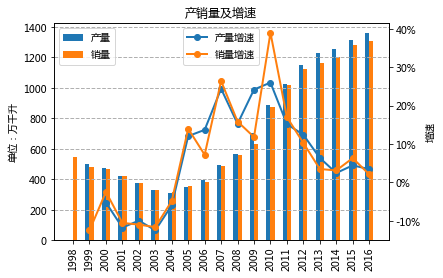

In [23]:
import matplotlib.ticker as mtick
fmt = '%.0f%%'  #不保留小数
yticks = mtick.FormatStrFormatter(fmt)

s = pd.DataFrame()
s['产量'] = output_year['白酒累计产量'][-19:]
s['销量'] = sales_year['白酒累计销售']
s['产量增速'] = s['产量'].pct_change(axis=0)*100
s['销量增速'] = s['销量'].pct_change(axis=0)*100
s.index = range(1998, 2017)

fig = plt.figure()

ax = s[['产量', '销量']].plot(kind='bar', use_index=True)
ax.grid(linestyle='--', linewidth=1, axis='y')
plt.title('产销量及增速')
plt.ylabel('单位：万千升')
plt.legend(('产量', '销量'))

ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), s[['产量增速', '销量增速']], linestyle='-', marker='o', linewidth=2.0)
ax2.yaxis.set_major_formatter(yticks)
plt.ylabel('增速')
plt.legend(('产量增速', '销量增速'), loc='upper center')

plt.savefig(r'pic/产销量及增速.png')
plt.show();

## 行业销售收入和销售单价

### 销售收入

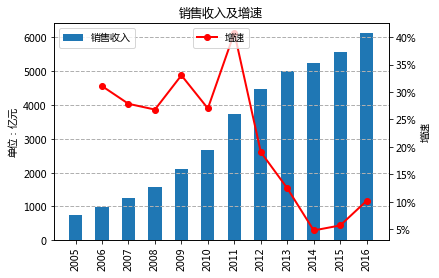

In [24]:
s = pd.DataFrame()
s['销售收入'] = [741.07, 971.4, 1241.96, 1574.85, 2095.17, 2661.14, 3746.67, 4461, 5018, 5258.89, 5558.86, 6125.74]
s['销量'] = [358.1, 383.9, 485.2, 562.1, 628.5, 873.3, 1021.8, 1126.7, 1166.2, 1202.6, 1278.8, 1305.7]
s['销售单价'] = s['销售收入'] / s['销量']
s['销售收入增速'] = s['销售收入'].pct_change(axis=0) * 100
s['销售单价增速'] = s['销售单价'].pct_change(axis=0) * 100
s.index = range(2005, 2017)
# s.to_csv(r'data/销售收入.csv')
fig = plt.figure()

ax = s[['销售收入']].plot(kind='bar', use_index=True)
ax.grid(linestyle='--', linewidth=1, axis='y')
plt.title('销售收入及增速')
plt.ylabel('单位：亿元')
plt.legend(('销售收入', ))

ax2 = ax.twinx()
ax2.plot(
    ax.get_xticks(), s[['销售收入增速']], color='r', linestyle='-', marker='o', linewidth=2.0)
ax2.yaxis.set_major_formatter(yticks)
plt.ylabel('增速')
plt.legend(('增速', ), loc='upper center')

plt.savefig(r'pic/销售收入及增速.png')
plt.show()

### 销售单价

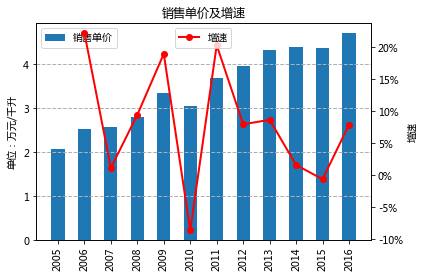

In [25]:
fig = plt.figure()

ax = s[['销售单价']].plot(kind='bar', use_index=True)
ax.grid(linestyle='--', linewidth=1, axis='y')
plt.title('销售单价及增速')
plt.ylabel('单位：万元/千升')
plt.legend(('销售单价', ))

ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), s[['销售单价增速']], color='r', linestyle='-', marker='o', linewidth=2.0)
ax2.yaxis.set_major_formatter(yticks)
plt.ylabel('增速')
plt.legend(('增速',), loc='upper center')

plt.savefig(r'pic/销售单价及增速.png')
plt.show();

### 总结

**1.从销售收入来看，和前面结果类似。**

从2005年之后，行业销售收入维持高增长,2011年增速最高达到40%。

2012年之后增速下降，14年增速下降至谷底，近三年维持较低增速。

**2.从销售单价来看。**

总体趋势上，销售单价逐渐增长。2005-2016年间销售单价上涨一倍多。

## 行业集中度

### 行业企业数和亏损企业数

此处仅统计规模以上企业数。2011年前标准为年收入500万，2011年起则为2000万

In [26]:
s = pd.read_csv(r'data/company_count.csv')
s['亏损比例'] = s['亏损企业数']/s['企业数']
s.index = [str(i) for i in range(2003, 2017)]
del s['时间']
s

,企业数,亏损企业数,亏损比例
2003,1001,240.0,0.239760
2004,986,199.0,0.201826
2005,957,162.0,0.169279
2006,1055,141.0,0.133649
2007,1159,123.0,0.106126
2008,1441,121.0,0.083969
2009,1521,114.0,0.074951
2010,1626,105.0,0.064576
2011,1277,54.0,0.042287
2012,1387,61.0,0.043980


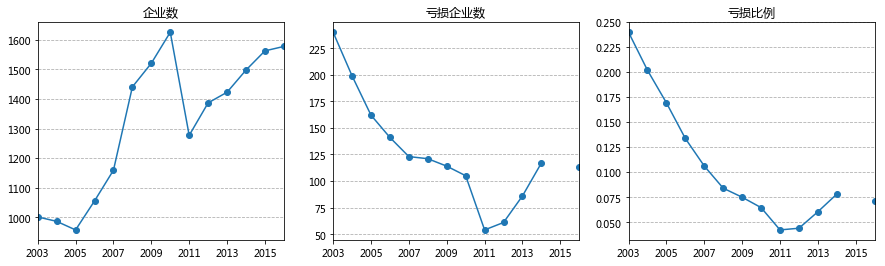

In [27]:
fig = plt.figure()
fig.set_figheight(4)
fig.set_figwidth(15)

plt.subplot(131)
s['企业数'].plot(kind='line', marker='o')
plt.title('企业数')
plt.grid(axis='y', linestyle='--')

plt.subplot(132)
s['亏损企业数'].plot(kind='line', marker='o')
plt.title('亏损企业数')
plt.grid(axis='y', linestyle='--')

plt.subplot(133)
s['亏损比例'].plot(kind='line', marker='o')
plt.title('亏损比例')
plt.grid(axis='y', linestyle='--')

plt.savefig(r'pic/行业企业数.png')
plt.show();

由于2011年变更统计标准，导致行业企业数突降。

但单看两侧，2005年之后每年规模以上企业数都在增加。

亏损企业方面，2003-2010年亏损企业数一直减少；2012年开始亏损企业数开始增多。亏损企业数比例也与此一致

### 行业经营状况

# 行业上下游

# 行业需求分析

## 人口数据

In [28]:
population_age = pd.read_csv(r'data/人口年龄结构.csv', skiprows=2, skipfooter=2, engine='python')
population_age.index = range(1989, 2016)
# population_age.iloc[1:, 7:13].sum(axis=1)

In [29]:
people_2 = pd.read_csv(r'data/人口年龄结构_抽样.csv', skiprows=2, skipfooter=2, engine='python')


people_2.iloc[1:, 7:13]

a = people_2.iloc[1:, 7:13].sum(axis=1)

b = people_2.iloc[1:, 1]

# 25-54岁人群所占比例
c = a/b

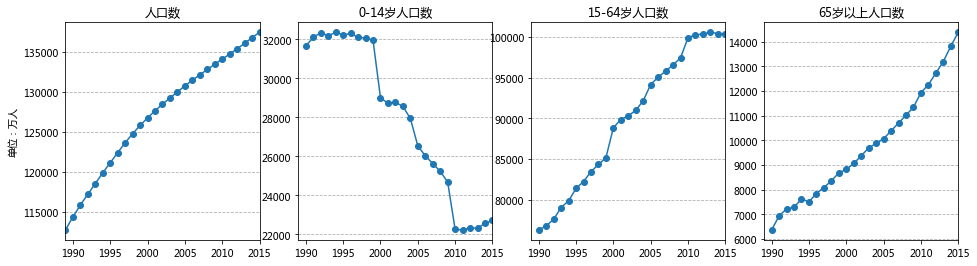

In [30]:
fig = plt.figure()
fig.set_figheight(4)
fig.set_figwidth(16)

plt.subplot(141)
population_age['年末总人口(万人)'].plot(kind='line', marker='o')
plt.title('人口数')
plt.ylabel('单位：万人')
plt.grid(axis='y', linestyle='--')

plt.subplot(142)
population_age['0-14岁人口(万人)'].plot(kind='line', marker='o')
plt.title('0-14岁人口数')
plt.grid(axis='y', linestyle='--')

plt.subplot(143)
population_age['15-64岁人口(万人)'].plot(kind='line', marker='o')
plt.title('15-64岁人口数')
plt.grid(axis='y', linestyle='--')

plt.subplot(144)
population_age['65岁及以上人口(万人)'].plot(kind='line', marker='o')
plt.title('65岁以上人口数')
plt.grid(axis='y', linestyle='--')

plt.savefig(r'pic/人口数数据.png')
plt.show();

从人口数来看，15-64岁年龄段的人群数目一直在增长，但2010年开始基本不再增长（2015年首次出现下降）；而0-14岁人口数则基本处于下降趋势，2010年后有小幅增长；65岁以上人口则在一直增加。

## 人均可支配收入

人均可支配收入数据来源于国家统计局。需要注意的是，2013年开始统计口径等均有变化

In [31]:
income = pd.read_csv(r'data/城乡人均收入年度数据.csv', skiprows=2, skipfooter=2, engine='python')

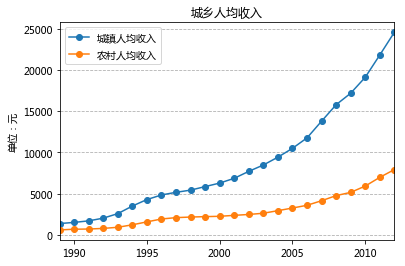

In [32]:
s = pd.DataFrame()
s['城镇人均收入'] = income['城镇居民家庭人均可支配收入(元)']
s['农村人均收入'] = income['农村居民家庭人均纯收入(元)']
s.index = range(1989, 2013)

s.plot(marker='o')
plt.grid(axis='y', linestyle='--')
plt.title('城乡人均收入')
plt.ylabel('单位：元')
plt.savefig(r'pic/城乡人均收入.png')
plt.show()

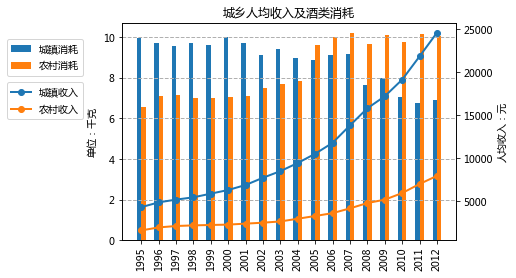

In [33]:
s = pd.DataFrame()
s['城镇人均收入'] = income['城镇居民家庭人均可支配收入(元)'][-18:]
s['农村人均收入'] = income['农村居民家庭人均纯收入(元)'][-18:]
s['城镇人均消耗'] = [9.93, 9.72, 9.55, 9.68, 9.61, 10.01, 9.68, 9.12, 9.39, 8.94, 8.85, 9.12, 9.14, 7.62, 7.99, 7.02, 6.76, 6.88]
s['农村人均消耗'] = [6.53, 7.11, 7.13, 6.98, 6.98, 7.02, 7.1, 7.5, 7.67, 7.84, 9.59, 9.97, 10.18, 9.67, 10.08, 9.74, 10.15, 10.04]
s.index = range(1995, 2013)

fig = plt.figure()

ax = s[['城镇人均消耗', '农村人均消耗']].plot(kind='bar', use_index=True)
ax.grid(linestyle='--', linewidth=1, axis='y')
plt.title('城乡人均收入及酒类消耗')
plt.ylabel('单位：千克')
plt.legend(('城镇消耗', '农村消耗'), bbox_to_anchor=(-0.1, 0.95))

ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), s[['城镇人均收入', '农村人均收入']], linestyle='-', marker='o', linewidth=2.0)
plt.ylabel('人均收入：元')
plt.legend(('城镇收入', '农村收入'), bbox_to_anchor=(-0.1, 0.75))

plt.savefig(r'pic/城乡人均收入及酒类消耗.png')
plt.show();

In [34]:
s.T

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
城镇人均收入,4283.00,4838.90,5160.30,5425.10,5854.00,6280.00,6859.60,7702.80,8472.20,9421.60,10493.00,11759.50,13785.80,15780.80,17174.70,19109.40,21809.80,24564.70
农村人均收入,1577.70,1926.10,2090.10,2162.00,2210.30,2253.40,2366.40,2475.60,2622.20,2936.40,3254.90,3587.00,4140.40,4760.60,5153.20,5919.00,6977.30,7916.60
城镇人均消耗,9.93,9.72,9.55,9.68,9.61,10.01,9.68,9.12,9.39,8.94,8.85,9.12,9.14,7.62,7.99,7.02,6.76,6.88
农村人均消耗,6.53,7.11,7.13,6.98,6.98,7.02,7.10,7.50,7.67,7.84,9.59,9.97,10.18,9.67,10.08,9.74,10.15,10.04


可以看到1995-2012年间，城镇居民人均收入从4283元上升到了24564元；与此同时，人均酒类消耗则由9.93千克降到了6.88千克。
农村居民人均收入从1578元上升到了7917元；人均酒类消耗由6.53千克上升到10.04千克。

## 人均饮酒量

### 世界人均酒精消费量

数据主要来自于WHO。

这里的酒精摄入量计算方法为：将各种酒消费量乘以其酒精度数，从而得到其纯酒精的消费量，最后进行加总。

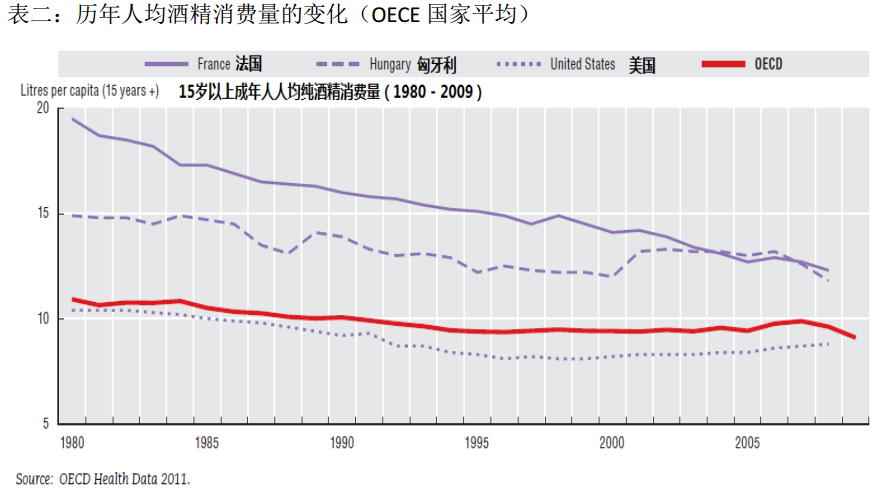

In [35]:
display(Image(r'data/OPEC.png'))

从时间维度上来看，图中各个国家的人均酒精消费量一直呈现下降趋势。

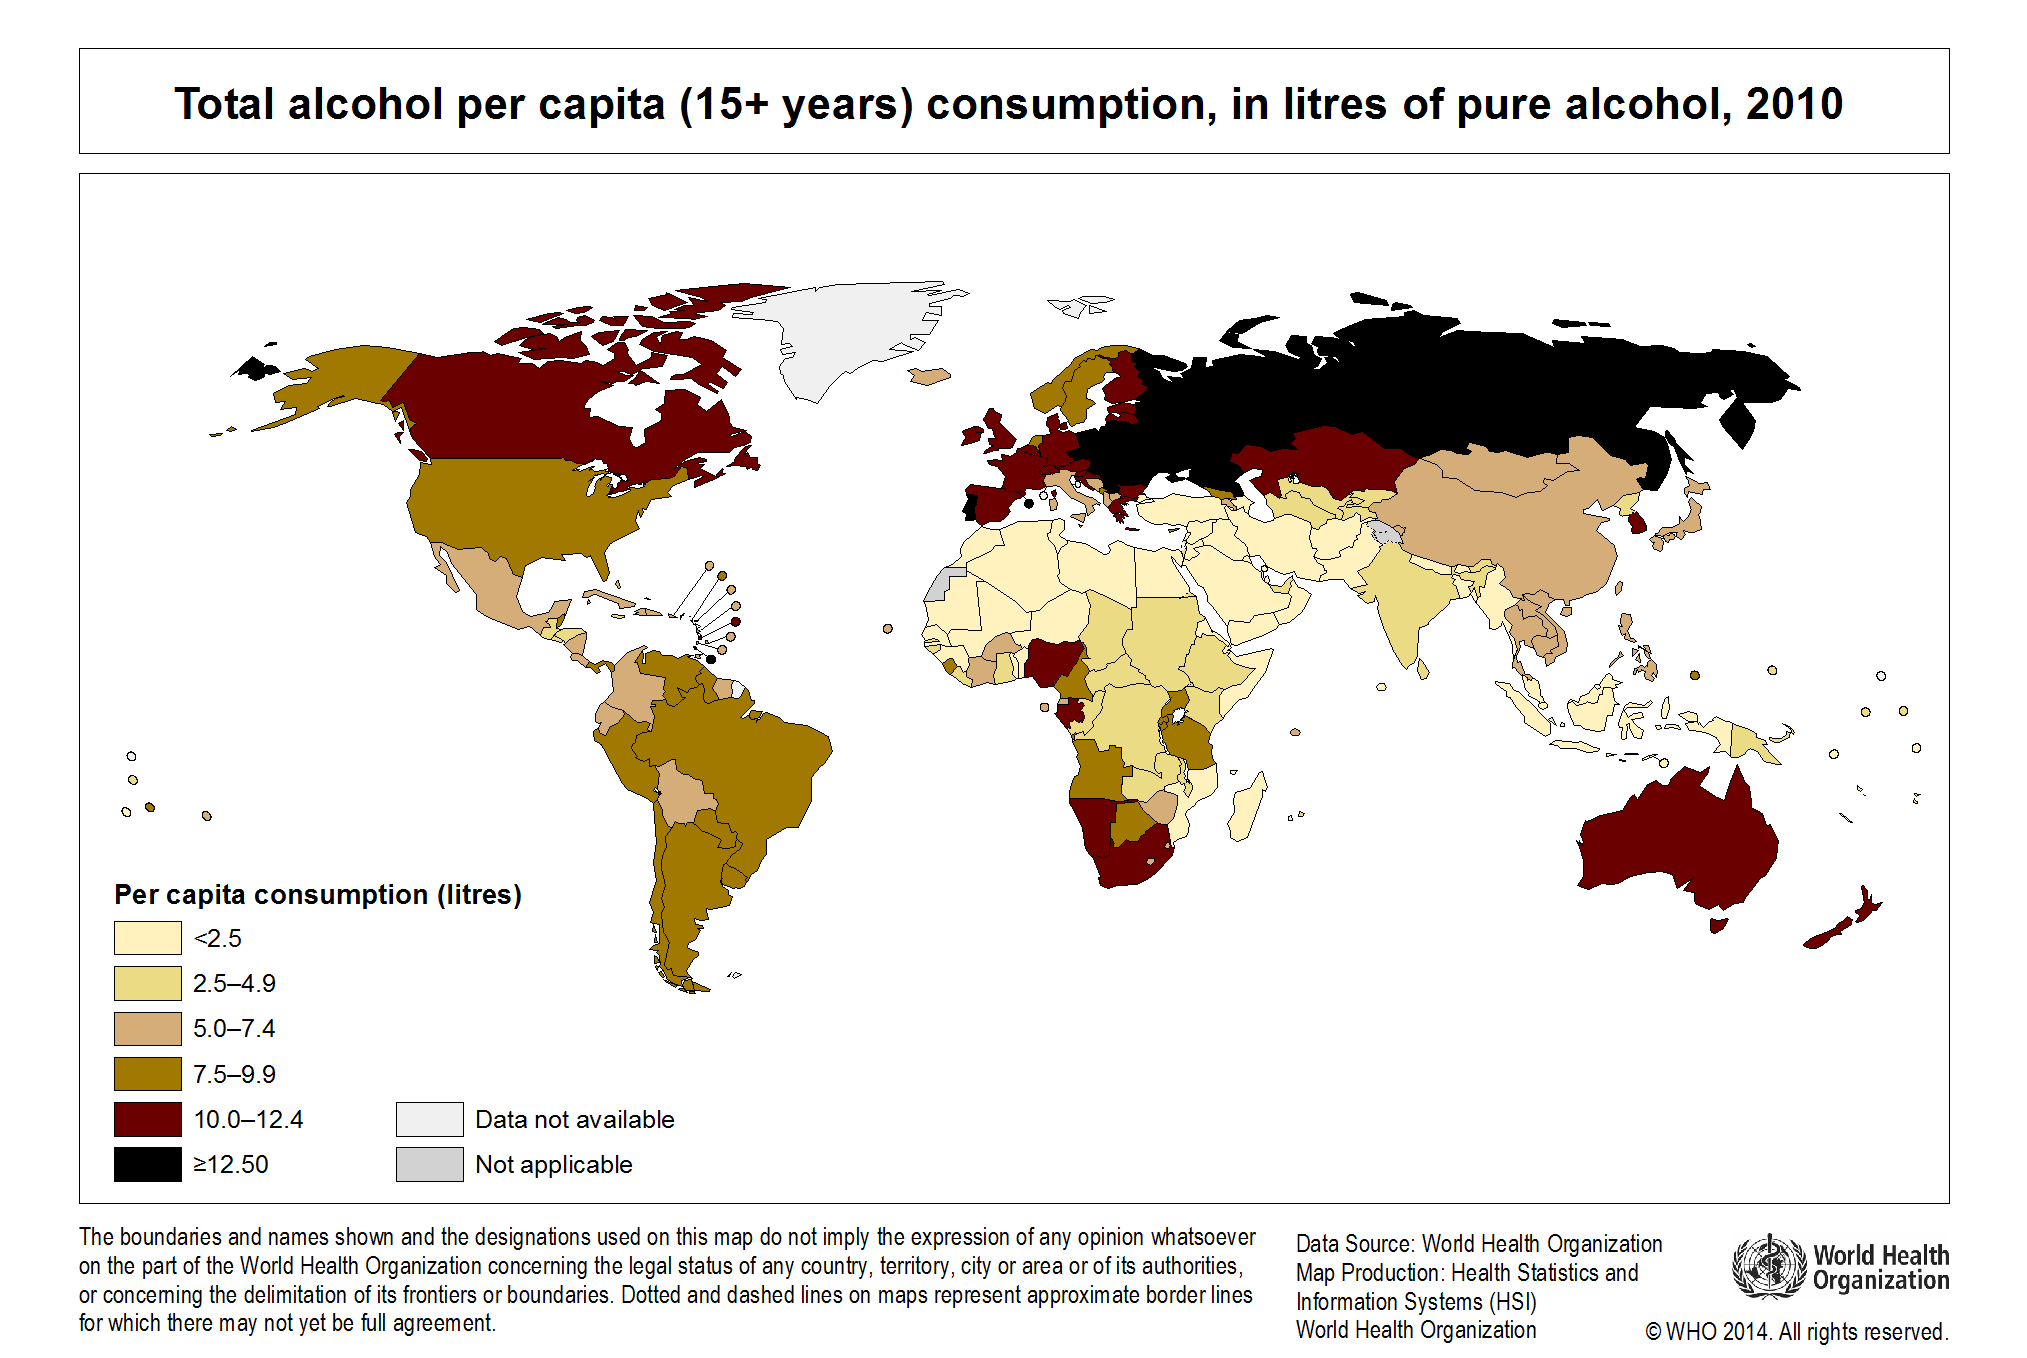

In [36]:
display(Image(r'data/Global_consumption_percapita_2010.png'))

上图为2010年世界各国人均酒精消费量（更详细的数据见http://gamapserver.who.int/gho/interactive_charts/gisah/consumption_adult/atlas.html ）。统计的是15岁以上人群。图中颜色越深，表示人均酒精消费量越多。

可以看到，2010年人均酒精消费量较多的国家包括俄罗斯和部分欧洲国家、加拿大、澳大利亚等。

中国落在5.0-7.4 L/人的区间；美国是7.5-9.9 L/人；欧洲则为10.0L/人以上。

可以推断，人均酒精摄入量与经济发达程度、纬度都有关系：
经济越发达，人均收入越高，酒精摄入量越大；
纬度越高（气温更低），酒精摄入量也相对增大。
**对于中国未来的情况而言，可能大致跟纬度接近的美国类似。**

#### 中美两国对比

根据OPEC数据，2008-2010期间中国人均酒精摄入量为6.7L/人，美国则为9.2L/人。

按性别看，中国和美国女性/男性的人均数据分别为2.2/10.9，4.9/13.6。中国的人均数据均低于美国。不过美国男性人均是女性2.5倍左右，中国则是5倍。

此外，单独计算饮酒者人均摄入量时，2008-2010中国饮酒者人均摄入量已经达到15.14L/人，美国则为13.27L/人。中国实际上已经超过美国。

### 国内人均数据

#### 15-64岁人均白酒销量

In [37]:
s = pd.DataFrame()
s['15-64'] = population_age['15-64岁人口(万人)'][-13:]
s['白酒销量'] = [i for i in sales_year['白酒累计销售'][-13:]]
sales_year['白酒累计销售'][-13:]
s['15-64人均'] = s['白酒销量']/s['15-64']*1000
s.index = range(2003, 2016)
s

,15-64,白酒销量,15-64人均
2003,90976.0,314.2,3.453658
2004,92161.0,358.1,3.885592
2005,94144.0,383.9,4.077796
2006,95037.0,485.2,5.105380
2007,95794.0,562.1,5.867800
2008,96547.0,628.5,6.509783
2009,97419.0,873.3,8.964370
2010,99898.0,1021.8,10.228433
2011,100243.0,1126.7,11.239688
2012,100334.0,1166.2,11.623179


以白酒销量计，（15-64岁）人均白酒销售量从2003年的3.45L一路升到2015年的13L（折65度白酒26瓶）。

#### 城乡居民人均酒类消耗量

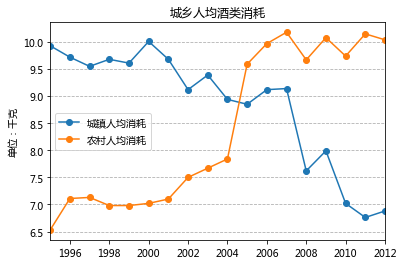

In [38]:
s = pd.DataFrame()
s['城镇人均消耗'] = [9.93, 9.72, 9.55, 9.68, 9.61, 10.01, 9.68, 9.12, 9.39, 8.94, 8.85, 9.12, 9.14, 7.62, 7.99, 7.02, 6.76, 6.88]
s['农村人均消耗'] = [6.53, 7.11, 7.13, 6.98, 6.98, 7.02, 7.1, 7.5, 7.67, 7.84, 9.59, 9.97, 10.18, 9.67, 10.08, 9.74, 10.15, 10.04]
s.index = range(1995, 2013)
s.plot(marker='o')
plt.grid(axis='y', linestyle='--')
plt.title('城乡人均酒类消耗')
plt.ylabel('单位：千克')
plt.savefig(r'pic/城乡人均酒类消耗.png')
plt.show()

从上图可以看出，1995-2012年，城镇居民人均酒类消耗量一直在下降，而农村居民人均消耗量则一路上升。

对比两端的1995年和2012年，城镇居民和农村居民刚好掉了个儿。

这大概可以很好地说明：随着生活水平的提高和健康意识的逐渐提升，人均酒类消耗会呈现倒V字型，即先上升后下降，但转折点在哪里则很难判断。

#### 各地区农村人均酒类消耗量

In [39]:
countryside = pd.read_csv(r'data/countryside.csv')
countryside

,时间,东部地区,中部地区,西部地区,东北地区
0,2005,13.19,7.88,6.51,15.55
1,2006,12.93,8.65,7.13,15.96
2,2007,13.29,8.65,7.23,16.95
3,2008,12.00,8.27,7.32,16.34
4,2009,12.53,8.64,7.56,17.27
5,2010,11.85,8.27,7.56,16.91
6,2011,11.71,8.92,7.79,20.44


In [40]:
del countryside['时间']
countryside.index = range(2005, 2012)

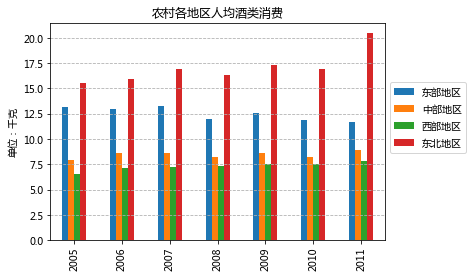

In [41]:
countryside.plot(kind='bar')
plt.grid(axis='y', linestyle='--')
plt.legend(bbox_to_anchor=(1, 0.75))
plt.title('农村各地区人均酒类消费')
plt.ylabel('单位：千克')
plt.show()

从图中可以看出，不同农村地区人均酒类消耗相差很大。

从不同地区来看，东北地区>东部地区>中部地区>西部地区

从不同年份来看，除了东部地区人均酒类消耗下降外，其他三个地区人均消耗均在增加。
这里体现出来的趋势与上面提到的一致，即人均酒类消费会呈现倒V字型。